# Anomaly Detection

<br />

There are 3 kinds of anomaly detections of time series data including outlier detection, abnormalities detection and change point detection.


On this sprint, I am going to implement KNN to do outlier detections.

## [Task 1] Research

    - Anomaly detection by KNN evaluates whether unknown data are regular or anomalous under a situation that there is a set of regular data of dimentional vectors.
    
    - If unknown data are far from the set of regilar data, it is possible that the unknown data are anomalous, and vice versa.
    
    - It is necessary to transform time series data to a set of vectors by taking any window width.

## [Task 2] Outlier Detection by KNN

<br />

I am going to do outlier detections for prices data of Bitcoin by KNN.

<br />

"仮想通貨(暗号通貨)４本値CSVゲッター from Cryptowatch"


http://nipper.work/btc/index.php?market=bitFlyer&coin=BTCJPY&periods=86400&after=1420070400

In [1]:
from statistics import mean, variance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

In [2]:
# Read the data

data = pd.read_csv("btc.csv", encoding="shift-jis", header=None)

In [3]:
# Check

data.head()

,0,1,2,3,4,5
0,2016-12-30 00:00:00,0.00769,0.00875,0.00769,0.00845,7870.4500
1,2016-12-31 00:00:00,0.00850,0.00891,0.00842,0.00843,3269.1045
2,2017-01-01 00:00:00,0.00856,0.00864,0.00826,0.00833,3206.9350
3,2017-01-02 00:00:00,0.00838,0.00892,0.00811,0.00821,5814.5170
4,2017-01-03 00:00:00,0.00821,0.00854,0.00800,0.00850,690.7145


In [4]:
data.shape

(366, 6)

- Explanations of the columns


    - 0: Date and time
    
    - 1: Opening price
    
    - 2: Highest price
    
    - 3: Lowest price
    
    - 4: Closing price
    
    - 5: Volume

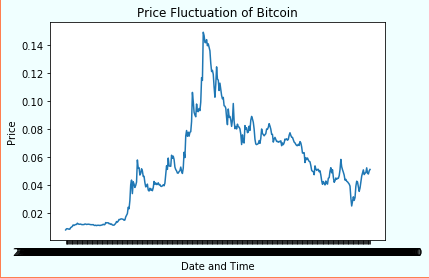

In [5]:
# Visualize the data

plt.figure(facecolor="azure", edgecolor="coral", linewidth=2)

plt.plot(data.iloc[:, 0], data.iloc[:, 1])

plt.title("Price Fluctuation of Bitcoin")
plt.xlabel('Date and Time')
plt.ylabel('Price')
plt.show()

In [7]:
def knn(X, wide, k):
    anormaly_score = []
    samples = len(X) - wide - 1
    # Split an input data into any sequence
    for i in range(samples):
        s_index = i
        e_index = i + wide
        data_x = X[s_index:e_index]
        point_x = X[e_index]
        u_d = np.sqrt(np.power(data_x-point_x, 2))
        u_d = np.sort(u_d)
        ave_u_d = np.average(u_d[0:k])
        anormaly_score.append(ave_u_d)

    return anormaly_score

In [9]:
# Validate the definitions

anormaly_score = knn(data.iloc[:,1], 15, 1)

In [10]:
# Check

anormaly_score

[0.0004299999999999998,
 0.00012000000000000031,
 0.00010000000000000113,
 3.999999999999837e-05,
 9.999999999999593e-06,
 6.0000000000001025e-05,
 3.0000000000000512e-05,
 9.999999999999593e-06,
 3.0000000000002247e-05,
 1.0000000000001327e-05,
 0.0,
 0.0,
 2.000000000000092e-05,
 2.000000000000092e-05,
 2.000000000000092e-05,
 1.9999999999999185e-05,
 3.0000000000000512e-05,
 1.9999999999999185e-05,
 9.999999999999593e-06,
 0.0003599999999999992,
 0.00021000000000000012,
 4.0000000000000105e-05,
 7.000000000000062e-05,
 4.99999999999997e-05,
 2.000000000000092e-05,
 9.999999999997858e-06,
 9.999999999999593e-06,
 0.0,
 3.999999999999837e-05,
 0.00011999999999999858,
 0.00024000000000000063,
 1.9999999999999185e-05,
 9.999999999999593e-06,
 0.0011999999999999997,
 0.00018000000000000134,
 5.999999999999929e-05,
 0.0,
 0.0003899999999999997,
 0.00017,
 4.0000000000000105e-05,
 0.0001799999999999996,
 8.000000000000021e-05,
 3.999999999999837e-05,
 4.99999999999997e-05,
 0.0,
 9.9999999

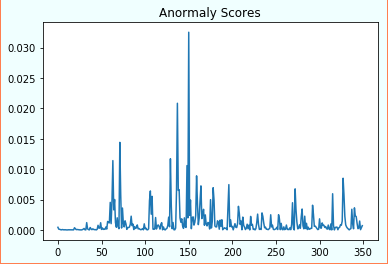

In [11]:
# Plot the results

plt.figure(facecolor="azure", edgecolor="coral", linewidth=2)

plt.plot(anormaly_score)

plt.title("Anormaly Scores")
plt.show()